In [1]:
from BiliFollowDB import BiliFollowDB
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

In [13]:
DB = BiliFollowDB('BiliFollow.db')


In [47]:
#输入开盒的uid
root = 7011838
DG = nx.DiGraph()
root_name = DB.getNameByUID(root)
dic = {root:root_name}
DG.add_node(root_name)

roots = [root, ]
for _ in range(2):
    new_roots = []
    for root in roots:
        followings = DB.getFollowingUIDsAndTime(root)
        followers = DB.getFollowerUIDsAndTime(root)
        for i in range(len(followings)):
            followings[i]['followTime'] = (datetime.datetime.now() - datetime.datetime.fromtimestamp(followings[i]['followTime'])).days
        for i in range(len(followers)):
            followers[i]['followTime'] = (datetime.datetime.now() - datetime.datetime.fromtimestamp(followers[i]['followTime'])).days

        for following in followings:
            if following['UID'] not in dic:
                dic[following['UID']] = DB.getNameByUID(following['UID'])
                DG.add_node(dic[following['UID']])
                new_roots.append(following['UID'])
            DG.add_edge(dic[root], dic[following['UID']], weight=following['followTime'])

        for follower in followers:
            if follower['UID'] not in dic:
                dic[follower['UID']] = DB.getNameByUID(follower['UID'])
                DG.add_node(dic[follower['UID']])
                new_roots.append(follower['UID'])
            DG.add_edge(dic[follower['UID']], dic[root], weight=follower['followTime'])
    roots = new_roots


print('N: {}, M: {}'.format(DG.number_of_nodes(), DG.number_of_edges()))




N: 42043, M: 43372


In [48]:
nodes_to_remove = [node for node in DG.nodes() if not DG.has_edge(node, root_name) and not DG.has_edge(root_name, node)]
nodes_to_remove.remove(root_name)
DG.remove_nodes_from(nodes_to_remove)

print('N: {}, M: {}'.format(DG.number_of_nodes(), DG.number_of_edges()))

for edge in list(DG.edges):
    if DG.number_of_edges(edge[0], edge[1]) > 1:
        DG.remove_edge(edge[0], edge[1])

print('N: {}, M: {}'.format(DG.number_of_nodes(), DG.number_of_edges()))

for edge in list(DG.edges):
    if DG.number_of_edges(edge[1], edge[0]) == 0:
        DG.remove_edge(edge[0], edge[1])

print('N: {}, M: {}'.format(DG.number_of_nodes(), DG.number_of_edges()))

for node in list(DG.nodes):
    if DG.degree(node) == 0:
        DG.remove_node(node)

print('N: {}, M: {}'.format(DG.number_of_nodes(), DG.number_of_edges()))




N: 55, M: 21
N: 55, M: 21
N: 55, M: 10
N: 7, M: 10


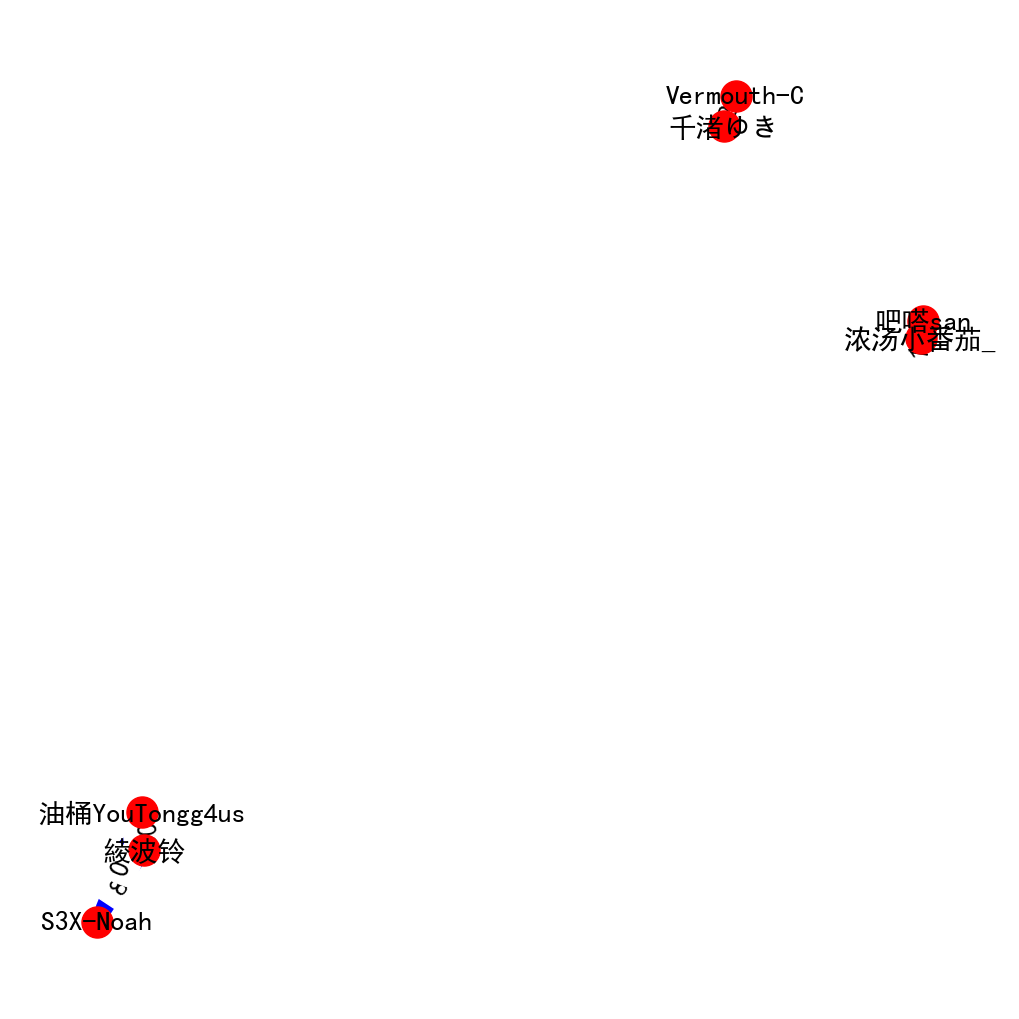

In [50]:
#画图，调大字体大小
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(DG)
edges, weights = zip(*nx.get_edge_attributes(DG, 'weight').items())
nx.draw(DG, pos, node_size=500, font_size=20, edgelist=edges, width=10, with_labels=True, edge_color='b', node_color='r')
nx.draw_networkx_edge_labels(DG, pos, edge_labels=nx.get_edge_attributes(DG, 'weight'), font_size=20)


plt.savefig('BiliFollow.png', dpi=1000)
plt.show()